In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import matplotlib.colors as mcolors
import sys
sys.path.append('../')
from utils import croco_sellonlatbox

In [2]:
rund0grid = xr.open_dataset('data/DESALADORAS_RUND0/crocod0_grd.nc').load()
rund1grid           = xr.open_dataset('../../DESALADORAS_RUND1/CROCO_FILES/crocod1_grd.bak.nc')
rund1grid_r2r       = xr.open_dataset('../../DESALADORAS_RUND1/CROCO_FILES/crocod1_grd.nc')
# rund1grid_r2r_viejo = xr.open_dataset('../DESALADORAS_RUND1/CROCO_FILES/crocod1_grd_smt.nc')

In [3]:
print(rund1grid.lon_rho.min().item(),rund1grid.lon_rho.max().item())
print(rund1grid.lat_rho.min().item(),rund1grid.lat_rho.max().item())


287.5 288.89814814814815
-32.7 -28.19205628459194


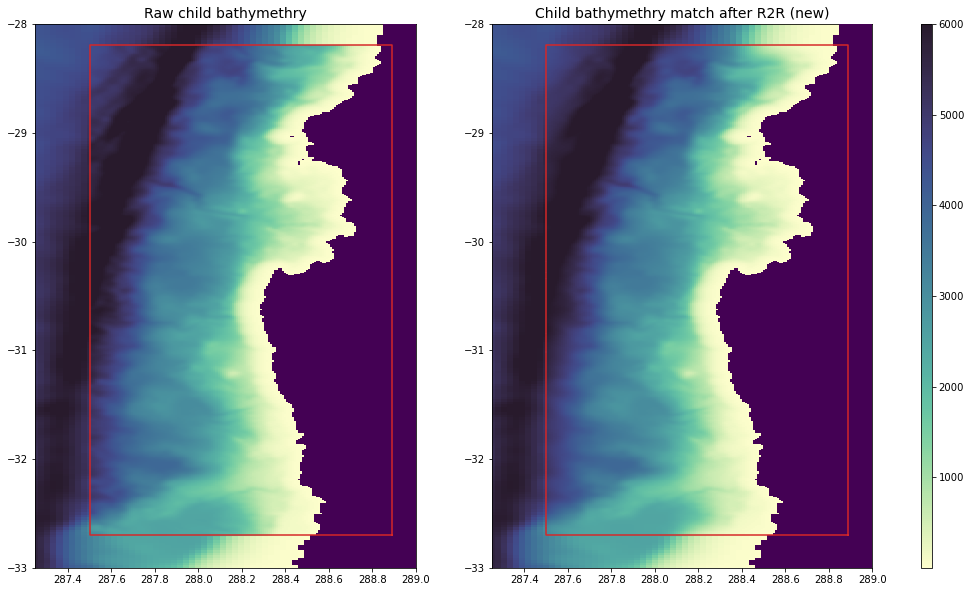

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

titles = ['Raw child bathymethry', 'Child bathymethry match after R2R (new)']
for i,axis in enumerate(ax.ravel()):
    axis.pcolormesh(rund1grid.lon_rho,rund1grid.lat_rho, rund1grid.mask_rho.where(rund1grid.mask_rho==0), zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho<rund1grid.lat_rho.min()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho>rund1grid.lat_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lon_rho>rund1grid.lon_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    axis.plot([288.89,287.5,287.5,288.89,288.89],
              [-32.7,-32.7,-28.19,-28.19,-32.7], color='tab:red', zorder=20)
    axis.set_xlim(287.25,289)
    axis.set_ylim(-33,-28)
    axis.set_title(titles[i], fontsize=14)
    
ax[0].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, rund0grid.h, cmap=cmocean.cm.deep, vmin=1, vmax=6.0e3)
ax[0].pcolormesh(rund1grid.lon_rho, rund1grid.lat_rho, rund1grid.h, cmap=cmocean.cm.deep, vmin=1, vmax=6.0e3)


ax[1].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, rund0grid.h, cmap=cmocean.cm.deep, vmin=1, vmax=6.0e3)
plot=ax[1].pcolormesh(rund1grid_r2r.lon_rho, rund1grid_r2r.lat_rho, rund1grid_r2r.h, cmap=cmocean.cm.deep, vmin=1, vmax=6.0e3)


box = ax[1].get_position()
cax = fig.add_axes([box.xmax*1.05, box.ymin, 0.01, box.ymax-box.ymin])
plt.colorbar(plot,cax=cax)


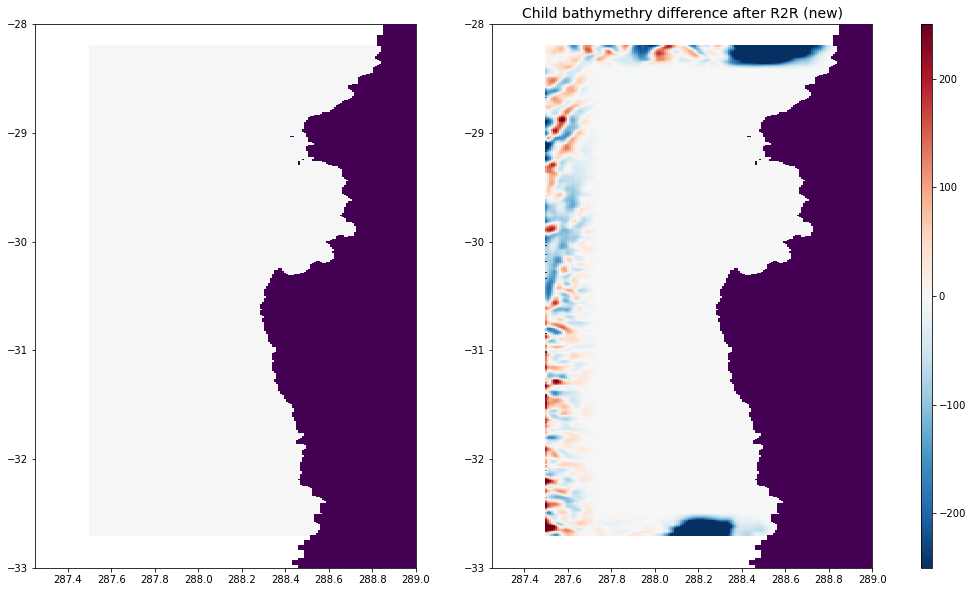

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

titles = ['', 'Child bathymethry difference after R2R (new)']
for i,axis in enumerate(ax.ravel()):
    axis.pcolormesh(rund1grid.lon_rho,rund1grid.lat_rho, rund1grid.mask_rho.where(rund1grid.mask_rho==0), zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho<rund1grid.lat_rho.min()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho>rund1grid.lat_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lon_rho>rund1grid.lon_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    # axis.plot([288.89,287.5,287.5,288.89,288.89],
    #           [-32.7,-32.7,-28.19,-28.19,-32.7], color='tab:red', zorder=20)
    axis.set_xlim(287.25,289)
    axis.set_ylim(-33,-28)
    axis.set_title(titles[i], fontsize=14)

    
# ax[0].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, rund0grid.h, cmap=cmocean.cm.deep, vmin=1, vmax=6.0e3)
ax[0].pcolormesh(rund1grid.lon_rho, rund1grid.lat_rho, rund1grid.h-rund1grid.h, cmap='RdBu_r', vmin=-2.5e2,vmax=2.5e2)


# ax[1].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, rund0grid.h, cmap=cmocean.cm.deep, vmin=1, vmax=6.0e3)
plot=ax[1].pcolormesh(rund1grid_r2r.lon_rho, rund1grid_r2r.lat_rho, rund1grid_r2r.h-rund1grid.h, cmap='RdBu_r', vmin=-2.5e2,vmax=2.5e2)

box = ax[1].get_position()
cax = fig.add_axes([box.xmax*1.05, box.ymin, 0.01, box.ymax-box.ymin])
plt.colorbar(plot,cax=cax)


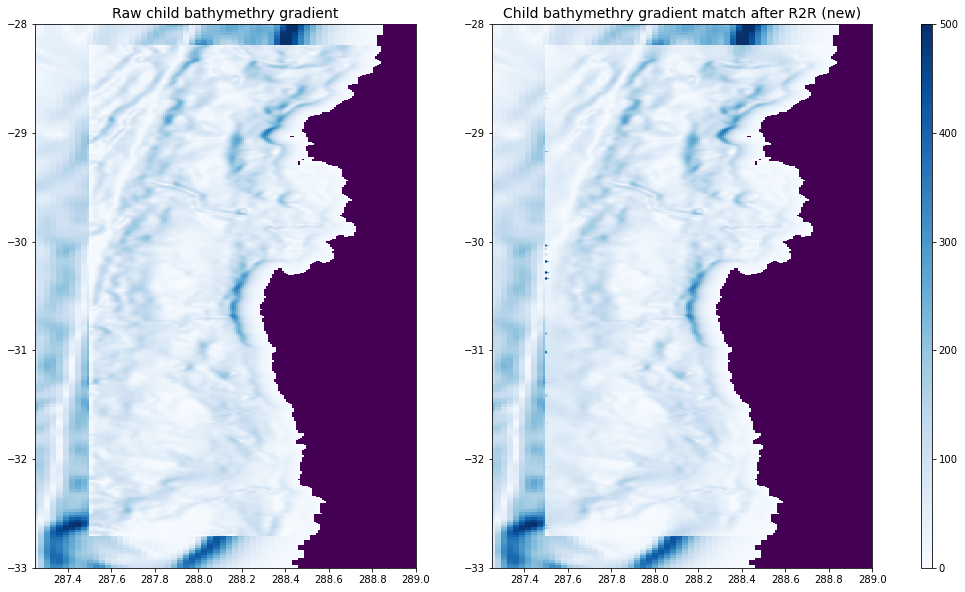

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

titles = ['Raw child bathymethry gradient', 'Child bathymethry gradient match after R2R (new)']
for i,axis in enumerate(ax.ravel()):
    axis.pcolormesh(rund1grid.lon_rho,rund1grid.lat_rho, rund1grid.mask_rho.where(rund1grid.mask_rho==0), zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho<rund1grid.lat_rho.min()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho>rund1grid.lat_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lon_rho>rund1grid.lon_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    # axis.plot([288.89,287.5,287.5,288.89,288.89],
    #           [-32.7,-32.7,-28.19,-28.19,-32.7], color='tab:red', zorder=20)
    axis.set_xlim(287.25,289)
    axis.set_ylim(-33,-28)
    axis.set_title(titles[i], fontsize=14)
    
ax[0].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, np.hypot(rund0grid.h.differentiate('xi_rho'),rund0grid.h.differentiate('eta_rho')), cmap='Blues', vmin=0,vmax=500)
ax[0].pcolormesh(rund1grid.lon_rho, rund1grid.lat_rho, np.hypot(rund1grid.h.differentiate('xi_rho'),rund1grid.h.differentiate('eta_rho')), cmap='Blues', vmin=0,vmax=500)


ax[1].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, np.hypot(rund0grid.h.differentiate('xi_rho'),rund0grid.h.differentiate('eta_rho')), cmap='Blues', vmin=0,vmax=500)
plot=ax[1].pcolormesh(rund1grid_r2r.lon_rho, rund1grid_r2r.lat_rho, np.hypot(rund1grid_r2r.h.differentiate('xi_rho'),rund1grid_r2r.h.differentiate('eta_rho')), cmap='Blues', vmin=0,vmax=500)

box = ax[1].get_position()
cax = fig.add_axes([box.xmax*1.05, box.ymin, 0.01, box.ymax-box.ymin])
plt.colorbar(plot,cax=cax)


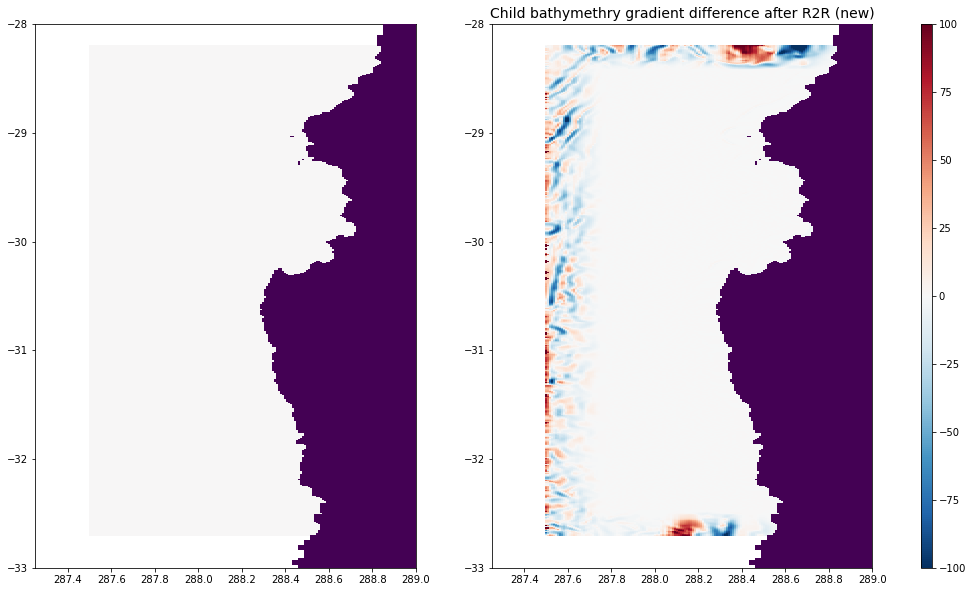

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

titles = ['', 'Child bathymethry gradient difference after R2R (new)']
for i,axis in enumerate(ax.ravel()):
    axis.pcolormesh(rund1grid.lon_rho,rund1grid.lat_rho, rund1grid.mask_rho.where(rund1grid.mask_rho==0), zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho<rund1grid.lat_rho.min()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lat_rho>rund1grid.lat_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    x = rund0grid.mask_rho.where(rund0grid.mask_rho==0)
    x = x.where((rund0grid.lon_rho>rund1grid.lon_rho.max()))
    axis.pcolormesh(rund0grid.lon_rho,rund0grid.lat_rho, x, zorder=10)
    # axis.plot([288.89,287.5,287.5,288.89,288.89],
    #           [-32.7,-32.7,-28.19,-28.19,-32.7], color='tab:red', zorder=20)
    axis.set_xlim(287.25,289)
    axis.set_ylim(-33,-28)
    axis.set_title(titles[i], fontsize=14)
    
# ax[0].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, np.hypot(rund0grid.h.differentiate('xi_rho'),rund0grid.h.differentiate('eta_rho'))-np.hypot(rund0grid.h.differentiate('xi_rho'),rund0grid.h.differentiate('eta_rho')), cmap='Blues', vmin=0,vmax=500)
ax[0].pcolormesh(rund1grid.lon_rho, rund1grid.lat_rho, np.hypot(rund1grid.h.differentiate('xi_rho'),rund1grid.h.differentiate('eta_rho'))-np.hypot(rund1grid.h.differentiate('xi_rho'),rund1grid.h.differentiate('eta_rho')), cmap='RdBu_r', vmin=-100,vmax=100)


# ax[1].pcolormesh(rund0grid.lon_rho, rund0grid.lat_rho, np.hypot(rund0grid.h.differentiate('xi_rho'),rund0grid.h.differentiate('eta_rho')), cmap='Blues', vmin=0,vmax=500)
plot=ax[1].pcolormesh(rund1grid_r2r.lon_rho, rund1grid_r2r.lat_rho, np.hypot(rund1grid_r2r.h.differentiate('xi_rho'),rund1grid_r2r.h.differentiate('eta_rho'))-np.hypot(rund1grid.h.differentiate('xi_rho'),rund1grid.h.differentiate('eta_rho')), cmap='RdBu_r', vmin=-100,vmax=100)

box = ax[1].get_position()
cax = fig.add_axes([box.xmax*1.05, box.ymin, 0.01, box.ymax-box.ymin])
plt.colorbar(plot,cax=cax)
